In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

# Data Exploration

In [2]:
img = cv2.imread('./test_images/testimg.jpg')
img.shape

(667, 1000, 3)

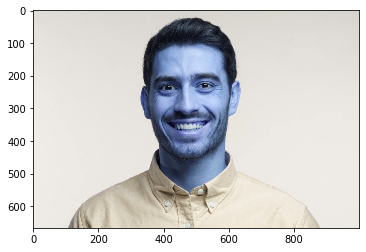

In [3]:
plt.imshow(img)

In [4]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_gray.shape

(667, 1000)

In [5]:
img_gray

array([[219, 219, 219, ..., 209, 209, 209],
       [219, 219, 219, ..., 209, 209, 209],
       [219, 219, 219, ..., 209, 209, 209],
       ...,
       [233, 233, 233, ..., 232, 232, 232],
       [233, 233, 233, ..., 232, 232, 232],
       [233, 233, 233, ..., 232, 232, 232]], dtype=uint8)

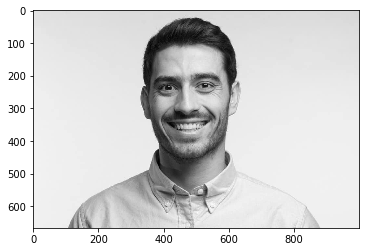

In [6]:
plt.imshow(img_gray, cmap='gray')

In [7]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(img_gray, 1.3, 5)
faces

array([[312, 105, 323, 323]], dtype=int32)

In [8]:
(x,y,w,h) = faces[0]
x,y,w,h

(312, 105, 323, 323)

## Detecting the face

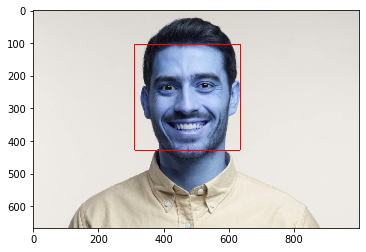

In [9]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

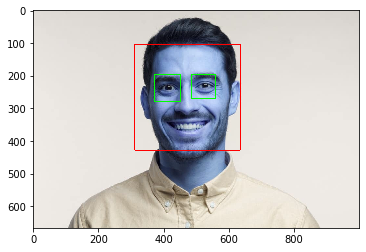

In [10]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = img_gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

plt.figure()
plt.imshow(face_img,cmap='gray')
plt.show()

## Detect the eyes

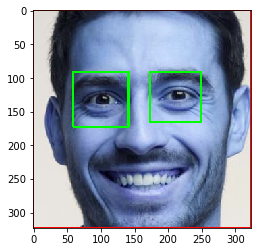

In [11]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

### Function 

In [12]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

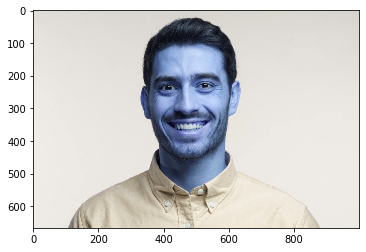

In [13]:
original_image = cv2.imread('./test_images/testimg.jpg')
plt.imshow(original_image)

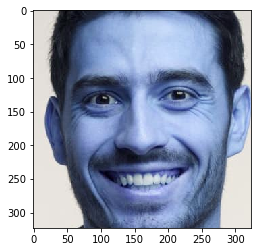

In [14]:
cropped_image = get_cropped_image_if_2_eyes('./test_images/testimg.jpg')
plt.imshow(cropped_image)

# Data Cleaning

## Creating the path to save te cropped images

In [15]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [16]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [17]:
img_dirs

['./dataset/jonquel_jones',
 './dataset/steven_gardiner',
 './dataset/shaunae_miller-uibo',
 './dataset/buddy_hield']

In [18]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

## Getting the sports player name from the folder name

In [19]:
cropped_image_dirs = []
sports_player_file_name_dict = {}

for img_dir in img_dirs:
    count = 1
    sports_player_name = img_dir.split('/')[-1]
    print(sports_player_name)
        
    sports_player_file_name_dict[sports_player_name] = []
        
#going through each folder and returning images with two eyes
    for entry in os.scandir(img_dir):
        #.DS_STORE was getting called so this handles that 
        if entry.name.endswith('.jpg'):
            roi_color = get_cropped_image_if_2_eyes(entry.path)

            #creating new folder with cropped images
            if roi_color is not None:
                cropped_folder = path_to_cr_data + sports_player_name
                if not os.path.exists(cropped_folder):
                    os.makedirs(cropped_folder)
                    cropped_image_dirs.append(cropped_folder)
                    print("Generating cropped images in folder: ", cropped_folder)

                #storing cropped image in cropped folder  
                cropped_file_name = sports_player_name + str(count) + ".png"
                cropped_file_path = cropped_folder + "/" + cropped_file_name

                cv2.imwrite(cropped_file_path, roi_color)
                sports_player_file_name_dict[sports_player_name].append(cropped_file_path)
                count += 1
                 
print("Cropping Complete")

jonquel_jones
Generating cropped images in folder:  ./dataset/cropped/jonquel_jones
steven_gardiner
Generating cropped images in folder:  ./dataset/cropped/steven_gardiner
shaunae_miller-uibo
Generating cropped images in folder:  ./dataset/cropped/shaunae_miller-uibo
buddy_hield
Generating cropped images in folder:  ./dataset/cropped/buddy_hield
Cropping Complete


## Wavelet transform

In [36]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

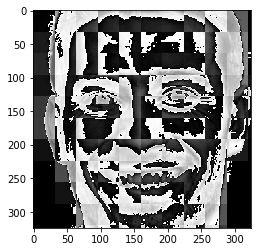

In [37]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har, cmap='gray')

In [38]:
class_dict = {}
count = 0
for sports_player_name in sports_player_file_name_dict.keys():
    class_dict[sports_player_name] = count
    count = count + 1
class_dict

{'jonquel_jones': 0,
 'steven_gardiner': 1,
 'shaunae_miller-uibo': 2,
 'buddy_hield': 3}

In [39]:
X, y = [], []
for sports_player_name, training_files in sports_player_file_name_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[sports_player_name])

### 4096 comes from the raw image shape plus the wave length image
#### 32*32*3 + 32*32

In [40]:
len(X[0])

4096

### To avoid errors when training the model we convert to float

In [41]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(184, 4096)

# Data Training

In [42]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=30)

#Sclaing the data and creating an SMV model 

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
#training model on x and y train
pipe.fit(X_train, y_train)
#Acceracy
pipe.score(X_test, y_test)

0.6216216216216216

#### Classification Report

In [44]:

print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.57      0.67      0.62        12
           2       0.73      0.62      0.67        13
           3       0.58      0.64      0.61        11

    accuracy                           0.62        37
   macro avg       0.47      0.48      0.47        37
weighted avg       0.61      0.62      0.61        37



/Users/antoneev/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### GridSearch SV (Tuning Models)

In [45]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [46]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,5,10,50,100],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10,50,100]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10,50,100]
        }
    }
}

In [47]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    #scale data
    pipe = make_pipeline(StandardScaler(), mp['model'])
    #train data with 5 cross validation
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    #training data which is split into train and valid by GridCV
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.653333,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.577471,{'randomforestclassifier__n_estimators': 50}
2,logistic_regression,0.618621,{'logisticregression__C': 1}


In [48]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=50))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [49]:
best_estimators['svm'].score(X_test,y_test)

0.6756756756756757

In [50]:
best_estimators['random_forest'].score(X_test,y_test)

0.5135135135135135

In [51]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.5945945945945946

In [52]:
best_clf = best_estimators['svm']

# Data Visualization

In [53]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[0, 0, 1, 0],
       [0, 8, 2, 2],
       [1, 3, 8, 1],
       [0, 2, 0, 9]])

Text(69.0, 0.5, 'Truth')

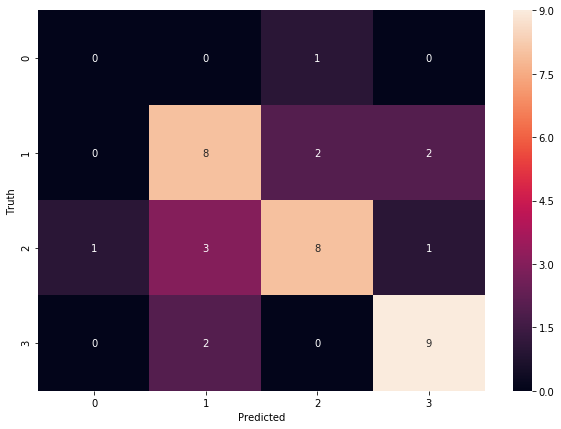

In [54]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [55]:
class_dict

{'jonquel_jones': 0,
 'steven_gardiner': 1,
 'shaunae_miller-uibo': 2,
 'buddy_hield': 3}

# Saving the trained model

In [56]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']

# Saving the class dictionary

In [57]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))